In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Read File: vmtable.csv and deployment.csv

In [2]:
data_path = 'trace_data/vmtable/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')

deployment_data_path = 'trace_data/deployments/deployments.csv'
deployment_headers=['deploymentid','deploymentsize']
deployment_trace_dataframe = pd.read_csv(deployment_data_path, header=None, index_col=False,names=deployment_headers,delimiter=',')

#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600

#Transform vmcorecount '>24' bucket to 30 and '>64' to 70
max_value_vmcorecountbucket = 30
max_value_vmmemorybucket = 70
trace_dataframe = trace_dataframe.replace({'vmcorecountbucket':'>24'},max_value_vmcorecountbucket)
trace_dataframe = trace_dataframe.replace({'vmmemorybucket':'>64'},max_value_vmmemorybucket)
trace_dataframe = trace_dataframe.astype({"vmcorecountbucket": int, "vmmemorybucket": int})
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecountbucket']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime,corehour
0,71fJw0x+SDRdAxKPwLyHZhTgQpYw2afS6tjJhfT6kHnmLH...,GB6uQC1NSArW5n+TtOybL7GQ1yByjuWtZnsj+5QccZ525R...,2sh/ZjaYdfpslv4iYBfNzFe4rs982kHVvNGJGeQ8MIBCDr...,558300,1673700,91.777,0.729,20.760,Delay-insensitive,8,32,309.833,2478.667
1,rKggHO/04j31UFy65mDTwtjdMQL/G03xWfl3xGeiilB4/W...,ub4ty8ygwOECrIz7eaZ/9hDwnCsERvZ3nJJ03sDSpD85et...,+ZraIDUNaWYDZMBiBtZm7xSjr+j3zcHGjup1+wyKxHFmyJ...,424500,425400,37.879,3.325,37.879,Unknown,4,32,0.250,1.000
2,YrR8gPtBmfNaOdnNEW5If1SdTqQgGQHEnLHGPjySt53bKW...,9LrdYRcUfGbmL2fFfLR/JUg2OTkjGRe3iluwIhDRPnPDPa...,GEyIElfPSFupze8T+T1niQMepeqG88VpLNuxUMyIDbz8VF...,1133100,1133700,0.304,0.221,0.304,Unknown,4,32,0.167,0.667
3,xzQ++JF1UAkh70CDhmzkiOo+DQn+E2TLErCFKEmSswv1pl...,0XnZZ8sMN5HY+Yg+0dykYB5oenlgsrCpzpgFSvn/MX42Ze...,7aCQS6fPUw9rwCPiqvghk/WCEbMV3KgNJjA+sssdfY5Ybl...,0,2591400,98.573,30.340,98.213,Interactive,2,4,719.833,1439.667
4,vZEivnhabRmImDr+JqKqZnpIM3WxtypwoxjfjnklR/idyR...,HUGaZ+piPP4eHjycCBki2yq0raJywdzrVuriR6nQceH3hA...,/s/D5VtTQDxyS6wq7N/VQAMczx61Ny1Ut3a3iFmDSOCXxp...,228300,229800,82.581,13.876,82.581,Unknown,2,4,0.417,0.833


In [3]:
trace_dataframe.columns

Index(['vmid', 'subscriptionid', 'deploymentid', 'vmcreated', 'vmdeleted',
       'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket',
       'vmmemorybucket', 'lifetime', 'corehour'],
      dtype='object')

In [9]:
cols = ["vmid", "subscriptionid", "deploymentid", "vmcategory"]
k = 10

pd.concat(
    [
        trace_dataframe[c]
        .value_counts()
        .head(k)
        .reset_index(drop=False)
        .rename(columns={"index": f"{c}_value", c: f"{c}_count"})
        for c in cols
    ],
    axis=1
)

,vmid_count,count,subscriptionid_count,count,deploymentid_count,count,vmcategory_count,count
0,71fJw0x+SDRdAxKPwLyHZhTgQpYw2afS6tjJhfT6kHnmLH...,1,wA+NjFBhsKDx+8aBOS/6S1q0poOnhIjD8c8SswoR9isthg...,366225,vE2K1xAdUSH+DnefD9hkyUppucTUrNggmwti2gXPA3buLk...,19113,Unknown,2457455.000
1,rKggHO/04j31UFy65mDTwtjdMQL/G03xWfl3xGeiilB4/W...,1,ipxXXsn0bCXkjmJOZtlV6bilgztEtGEBUXTFv0z3wY6BF8...,87230,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,18732,Delay-insensitive,159615.000
2,YrR8gPtBmfNaOdnNEW5If1SdTqQgGQHEnLHGPjySt53bKW...,1,CQ9dMho0ki5X13E9Y4zKK1mzgzsxewXArF1cpebW831CjU...,49547,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,17066,Interactive,78478.000
3,xzQ++JF1UAkh70CDhmzkiOo+DQn+E2TLErCFKEmSswv1pl...,1,f4bYah9JwPPLqz1T5p9IdaLGPsxEH3LJTcrbq7eadZF7+V...,48524,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,16529,NaN,NaN
4,vZEivnhabRmImDr+JqKqZnpIM3WxtypwoxjfjnklR/idyR...,1,T5YgbHHsKY6pX+pei3XcWWpIvtVWWkZQFnMYy4VtXV0riR...,47057,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,16001,NaN,NaN
5,MqvcZ6Au5ouI6if56MJHmoSqHtX8oRv0dPkaxCId3aUcr1...,1,4qyOW7DwhjSolTnKK27cY1ELmu2hqpBNkgiHsfTOex2UUb...,41690,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,15052,NaN,NaN
6,034PavXAkWso23QmI+NMty3u9XA2FVhIKKOZV+tbQru/n5...,1,IwABYzfINELEB6erwdivQX8xX4tewLrMhMLZPBvOQW1iQl...,38619,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,14693,NaN,NaN
7,fBpt5HSYGsQyRQSSrhj+n5IDFzMJKf2k6Am1OFEIGpFl6n...,1,RolpxcjLBi8Y2y52zZvPy23rUvsw2UJS1aIq3g6+v99SNS...,37810,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,14284,NaN,NaN
8,ZdSiRJc4t7SuV2uOfhbjkGXJPK6w1cuE8NcEYb+LJTOvWa...,1,1w+LFGQbAv1JTPW73KZMgTjkfG5cKk3D+vbstfR6qzPaB2...,34023,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,14268,NaN,NaN
9,uzIY/rjnHYDAGJ7AHxffw+n+QlBriI1s12yb7MtYSykiZf...,1,/5Gjsh5gbdN5PDUnddcH3ytiJdPHEU9EcEcqYGO+zhliYV...,34022,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,14239,NaN,NaN


In [4]:
trace_dataframe.loc[:, "vmcreated":].describe()

,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcorecountbucket,vmmemorybucket,lifetime,corehour
count,2695548.000,2695548.000,2695548.000,2695548.000,2695548.000,2695548.000,2695548.000,2695548.000,2695548.000
mean,1182968.595,1399931.235,55.695,15.585,47.172,3.813,16.195,60.272,174.154
std,798372.878,799674.773,36.965,18.742,35.772,4.261,15.293,186.179,701.268
min,0.000,0.000,0.000,0.000,0.000,2.000,2.000,0.083,0.167
25%,469800.000,701400.000,17.890,2.047,10.034,2.000,4.000,0.167,0.500
50%,1153200.000,1398300.000,61.829,8.197,48.511,2.000,8.000,0.500,1.667
75%,1860300.000,2140800.000,93.720,22.203,82.431,4.000,32.000,3.333,12.000
max,2591400.000,2591400.000,100.000,99.376,100.000,30.000,70.000,719.833,21595.000


# General Statistics

In [9]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2695548
Total Number of Subscriptions in the Dataset: 6687
Total Number of Deployments in the Dataset: 33205
Total VM Hours Available in the Dataset: 162465708.083333
Total Core Hours Available in the Dataset: 469439814.333333


# Read Azure 2019 datasets

In [10]:
lifetime_azure2019 = pd.read_csv('azure2019_data/lifetime.txt', header=0, delimiter='\t')
cpu_azure2019 = pd.read_csv('azure2019_data/cpu.txt', header=0, delimiter='\t')
# memory_azure2019 = pd.Series.from_csv('azure2019_data/memory.txt', header=0, sep='\t')
# core_azure2019 = pd.Series.from_csv('azure2019_data/cores.txt', header=0, sep='\t')
# category_azure2019 = pd.Series.from_csv('azure2019_data/category.txt', header=0, sep='\t')
memory_azure2019 = pd.read_csv('azure2019_data/memory.txt', header=0, index_col=0, sep='\t')
core_azure2019 = pd.read_csv('azure2019_data/cores.txt', header=0, index_col=0, sep='\t')
category_azure2019 = pd.read_csv('azure2019_data/category.txt', header=0, index_col=0, sep='\t')
deployment_azure2019 = pd.read_csv('azure2019_data/deployment.txt', header=0, delimiter='\t')

# Plot Functions

In [11]:
TraceLegend = "Azure 2019 - Public Dataset V2"
AzureLegend = "Azure 2019"

def CPUPlot(df, azure2019):
    counts_AVG = pd.DataFrame(df.groupby('avgcpu').size().rename('Freq')).reset_index()
    counts_P95 = pd.DataFrame(df.groupby('p95maxcpu').size().rename('Freq')).reset_index()
    counts_AVG = counts_AVG.rename(columns={'avgcpu': 'Bucket'})
    counts_P95 = counts_P95.rename(columns={'p95maxcpu': 'Bucket'})
    counts_AVG['cum'] = counts_AVG['Freq'].cumsum() / counts_AVG['Freq'].sum() * 100
    counts_P95['cum'] = counts_P95['Freq'].cumsum() / counts_P95['Freq'].sum() * 100
    ax = counts_AVG.plot(x='Bucket', y='cum',linestyle='--', color='b', title="VM CPU Utilization",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    azure2019.plot(x='bucket', y='avg', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    counts_P95.plot(x='Bucket', y='cum', linestyle='--', logx=False, color='b', ax=ax)
    azure2019.plot(x='bucket', y='p95', linestyle='-', logx=False, color='darkmagenta', ax=ax)
    ax.text(9, 85, 'Average', size=11, weight='bold')
    ax.text(50, 45, 'P95 Max',  size=11, weight='bold')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('CPU Utilization (%)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,100])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    ax.minorticks_off()

    
def LifetimePlot(df, azure2019):
    counts_lifetime = pd.DataFrame(df.groupby('lifetime').size().rename('Freq')).reset_index()
    counts_lifetime = counts_lifetime.rename(columns={'lifetime': 'bucket'})
    counts_lifetime['cum'] = counts_lifetime['Freq'].cumsum() / counts_lifetime['Freq'].sum() * 100
    ax = counts_lifetime[0:2500].plot(x='bucket', y='cum',linestyle='--',  color='b', title="VM Lifetime",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,10))
    azure2019[0:2500].plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Lifetime (Hours)')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,100])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    


def DeploymentPlot(df,azure2019):
    counts_deployment = pd.DataFrame(df.groupby('deploymentsize').size().rename('Freq')).reset_index()
    counts_deployment = counts_deployment.rename(columns={'deploymentsize': 'bucket'})
    counts_deployment.to_csv('deployment.txt', sep='\t', index=False)
    counts_deployment['cum'] = counts_deployment['Freq'].cumsum() / counts_deployment['Freq'].sum() * 100
    ax = counts_deployment[0:50].plot(x='bucket', y='cum',linestyle='--', color='b', title="Deployment Size",logx=False, legend=True, ylim=(0,100), yticks=range(0,110,20))
    azure2019.plot(x='bucket', y='value', linestyle='-', color='darkmagenta', logx=False, ax=ax)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('# VMs')
    ax.set_ylabel('CDF')
    ax.set_xlim([1,50])
    ax.legend([TraceLegend, AzureLegend], loc='best');
    
def MemoryPlot(df, azure2019):
    dataset = (df['vmmemorybucket'].value_counts(normalize=True)*100).sort_index().to_frame().T
    azure2019 = azure2019.T
    result = pd.concat([dataset,azure2019], axis=0).fillna(0)
    ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Memory Distribution', width=0.5, align='center')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.legend(["0-2", "2-4", "4-8", "8-32", '32-64', '>64'], title='Memory Size (GB) Bucket', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3);
    ax.set_ylabel('% of VMs')

def CorePlot(df, azure2019):
    dataset = (df['vmcorecountbucket'].value_counts(normalize=True)*100).sort_index().to_frame().T
    azure2019 = azure2019.T
    result = pd.concat([dataset,azure2019], axis=0).fillna(0)
    ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Cores Distribution', width=0.5, align='center')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.set_ylabel('% of VMs')
    ax.legend(["0-2", "2-4", "4-8", "8-12", '12-24', '>24'],title='Core Count Bucket', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3);
        

def CategoryPlot(df, azure2019):
    dataset = pd.DataFrame(df.groupby('vmcategory')['corehour'].sum().rename('corehour'))
    dataset = dataset.rename(columns={'vmcategory': 'Bucket'})
    dataset['value'] = dataset['corehour']/dataset['corehour'].sum() * 100
    dataset = dataset.drop('corehour', axis=1)
    dataset = dataset.sort_index().T
    azure2019 = azure2019.T
    frames = [dataset, azure2019]
    result = pd.concat(frames)
    ax = result.plot.bar(stacked=True, title='VM Category Distribution', color=['lightskyblue', 'orange', '0.75'], ylim=(0,100))
    ax.set_ylabel('% of core hours')
    ax.set_xticklabels([TraceLegend, AzureLegend], rotation=0)
    ax.legend(["Delay-insensitive", "Interactive", "Unknown"], loc='upper center', title='Categories', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize=10.5);
    


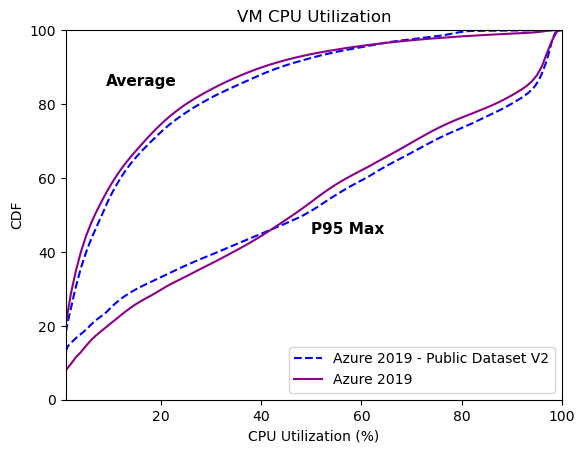

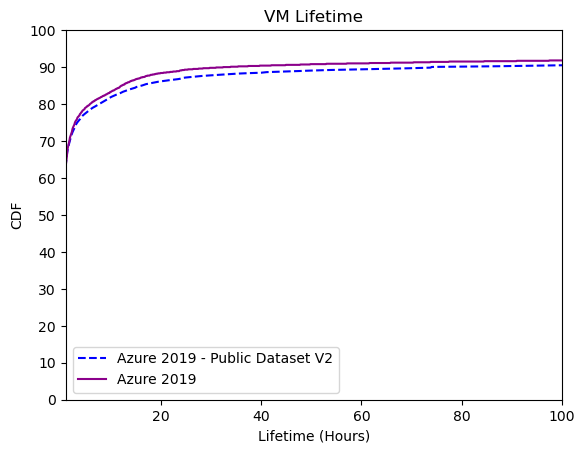

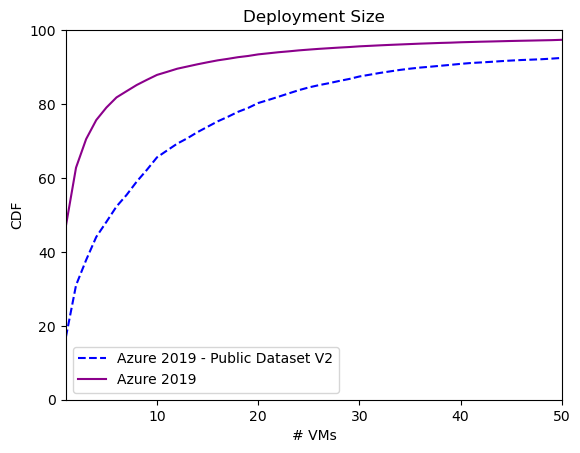

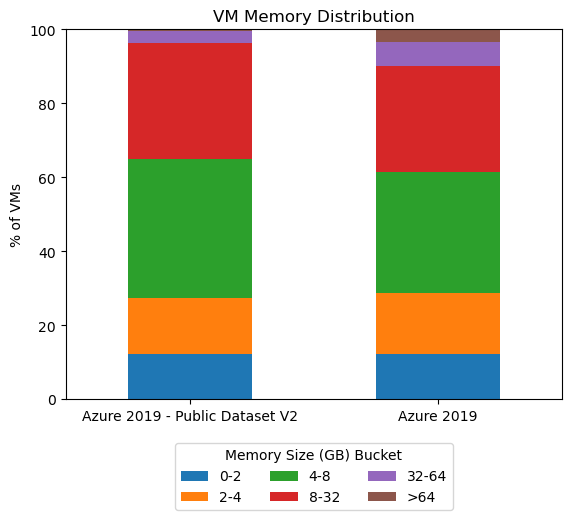

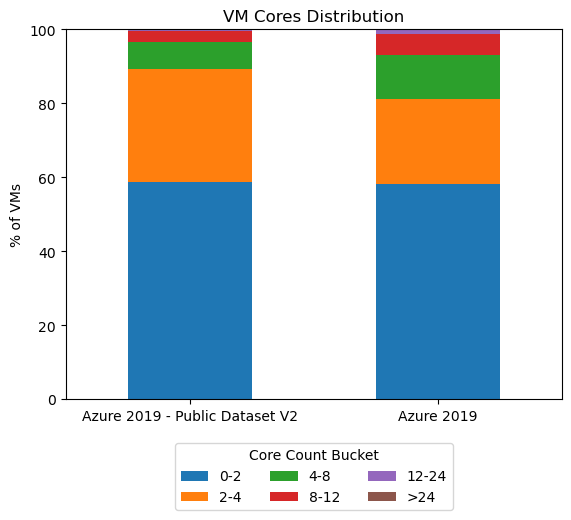

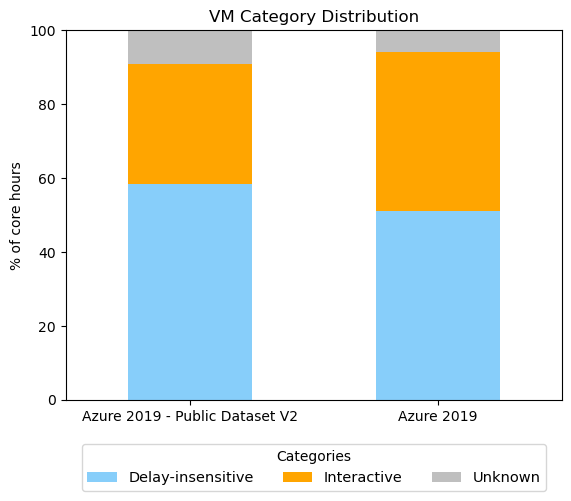

In [12]:
CPUPlot(trace_dataframe, cpu_azure2019)
LifetimePlot(trace_dataframe, lifetime_azure2019)
DeploymentPlot(deployment_trace_dataframe, deployment_azure2019)
MemoryPlot(trace_dataframe, memory_azure2019)
CorePlot(trace_dataframe, core_azure2019)
CategoryPlot(trace_dataframe, category_azure2019)


## Additional EDA checks (suggested)
- Schema validation: expected columns and types, range checks for timestamps and CPU percent.
- Missingness & duplicates: per-column null rates, duplicate IDs, duplicate rows.
- Distribution checks: histograms for CPU metrics, lifetime, deployment sizes.
- Cross-feature relationships: avg vs max CPU, lifetime vs CPU, category/core/memory vs utilization.
- Grouped summaries: per-category and per-core/memory bucket statistics.
- Trace sampling: use stratified/streaming sampling for vm_cpu_readings to avoid loading full data.


In [13]:

# Basic sanity checks on vmtable and deployments
print('vmtable rows:', trace_dataframe.shape[0])
print('deployments rows:', deployment_trace_dataframe.shape[0])

# Missingness
missing = trace_dataframe.isna().mean().sort_values(ascending=False) * 100
print('Missingness (percent):')
print(missing[missing > 0])

# Duplicates
print('Duplicate vmid rows:', trace_dataframe.duplicated(subset=['vmid']).sum())
print('Duplicate full rows:', trace_dataframe.duplicated().sum())

# Basic summary stats
print(trace_dataframe[['maxcpu','avgcpu','p95maxcpu','lifetime','vmcorecountbucket','vmmemorybucket']].describe())


vmtable rows: 2695548
deployments rows: 33205
Missingness (percent):
Series([], dtype: float64)
Duplicate vmid rows: 0
Duplicate full rows: 0
             maxcpu        avgcpu     p95maxcpu      lifetime  \
count  2.695548e+06  2.695548e+06  2.695548e+06  2.695548e+06   
mean   5.569548e+01  1.558524e+01  4.717247e+01  6.027187e+01   
std    3.696469e+01  1.874158e+01  3.577223e+01  1.861794e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  8.333333e-02   
25%    1.788954e+01  2.046747e+00  1.003428e+01  1.666667e-01   
50%    6.182933e+01  8.196631e+00  4.851057e+01  5.000000e-01   
75%    9.371976e+01  2.220331e+01  8.243065e+01  3.333333e+00   
max    1.000000e+02  9.937626e+01  1.000000e+02  7.198333e+02   

       vmcorecountbucket  vmmemorybucket  
count       2.695548e+06    2.695548e+06  
mean        3.812808e+00    1.619457e+01  
std         4.260733e+00    1.529347e+01  
min         2.000000e+00    2.000000e+00  
25%         2.000000e+00    4.000000e+00  
50%         2.

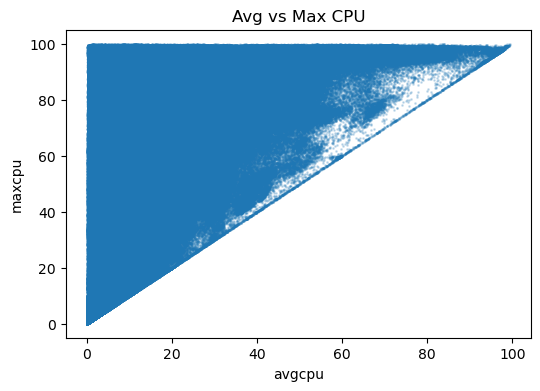

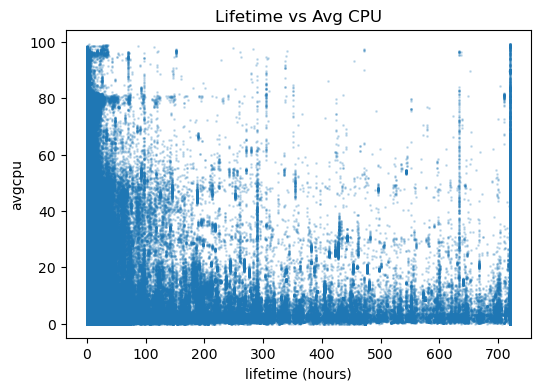

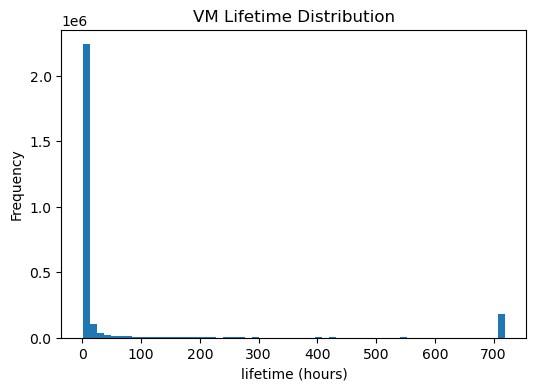

In [14]:

# Relationships and distributions
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(trace_dataframe['avgcpu'], trace_dataframe['maxcpu'], s=1, alpha=0.2)
ax.set_title('Avg vs Max CPU')
ax.set_xlabel('avgcpu')
ax.set_ylabel('maxcpu')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(trace_dataframe['lifetime'], trace_dataframe['avgcpu'], s=1, alpha=0.2)
ax.set_title('Lifetime vs Avg CPU')
ax.set_xlabel('lifetime (hours)')
ax.set_ylabel('avgcpu')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
trace_dataframe['lifetime'].plot(kind='hist', bins=60, ax=ax)
ax.set_title('VM Lifetime Distribution')
ax.set_xlabel('lifetime (hours)')
plt.show()


                      avgcpu     maxcpu  p95maxcpu    lifetime
vmcategory                                                    
Delay-insensitive   8.142823  87.966700  36.949633  635.233088
Interactive        11.547535  87.632671  35.658455  632.520557
Unknown            16.197583  52.579513  48.204155    4.652793
                      avgcpu     maxcpu  p95maxcpu
vmcorecountbucket                                 
2                  18.270545  63.111162  52.883314
4                  12.196339  40.045252  34.482904
8                  10.841197  60.879342  52.132443
24                  7.867350  53.684423  48.390897
30                 22.138313  81.928554  77.891487
                   avgcpu     maxcpu  p95maxcpu
vmmemorybucket                                 
2               22.340275  79.157823  58.586212
4               15.960682  60.430347  47.991855
8               16.720258  57.058021  50.964699
32              12.129404  42.423226  37.274875
64               7.779838  55.193644  48

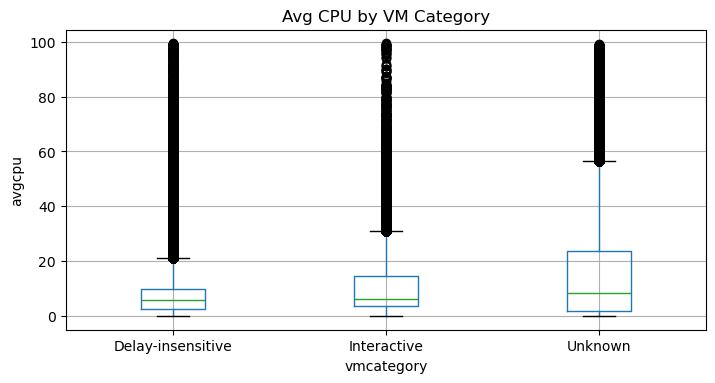

In [15]:

# Aggregations by category and buckets
category_stats = trace_dataframe.groupby('vmcategory')[['avgcpu','maxcpu','p95maxcpu','lifetime']].mean()
print(category_stats)

core_stats = trace_dataframe.groupby('vmcorecountbucket')[['avgcpu','maxcpu','p95maxcpu']].mean()
print(core_stats)

mem_stats = trace_dataframe.groupby('vmmemorybucket')[['avgcpu','maxcpu','p95maxcpu']].mean()
print(mem_stats)

fig, ax = plt.subplots(figsize=(8,4))
trace_dataframe.boxplot(column='avgcpu', by='vmcategory', ax=ax)
ax.set_title('Avg CPU by VM Category')
ax.set_xlabel('vmcategory')
ax.set_ylabel('avgcpu')
plt.suptitle('')
plt.show()


subscriptions rows: 6687


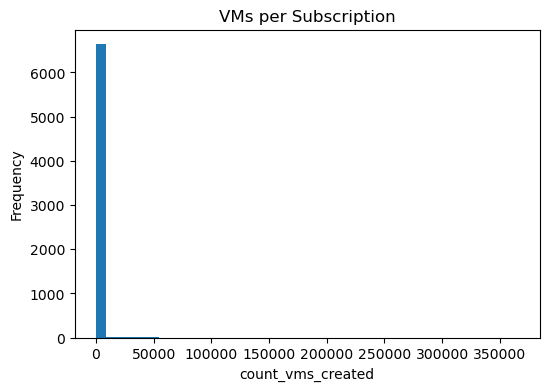

In [16]:

# Optional: subscriptions table if present
try:
    subscriptions_path = 'trace_data/subscriptions/subscriptions.csv'
    subscriptions_headers = ['subscriptionid','timestamp_first_vm_created','count_vms_created']
    subscriptions_df = pd.read_csv(subscriptions_path, header=None, names=subscriptions_headers)
    print('subscriptions rows:', subscriptions_df.shape[0])
    fig, ax = plt.subplots(figsize=(6,4))
    subscriptions_df['count_vms_created'].plot(kind='hist', bins=40, ax=ax)
    ax.set_title('VMs per Subscription')
    ax.set_xlabel('count_vms_created')
    plt.show()
except FileNotFoundError:
    print('subscriptions.csv not found, skipping.')



## Trace CPU Readings (sampled)
These files are very large. The cell below samples rows in a streaming way to keep memory bounded.


trace sample rows: 200000


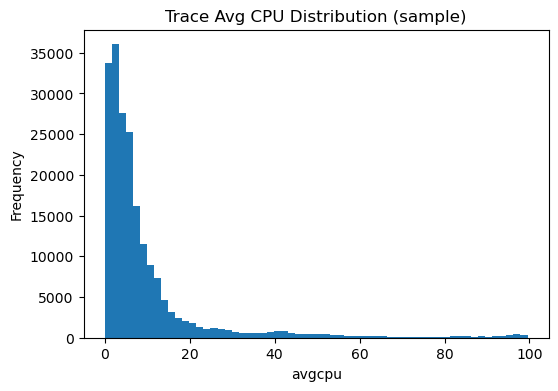

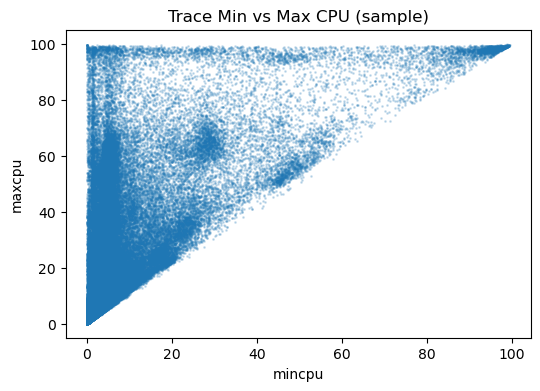

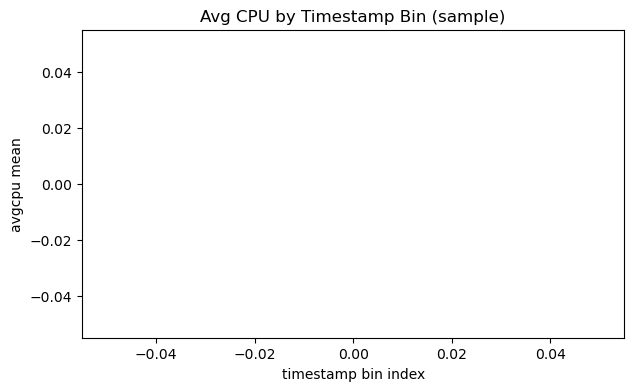

In [17]:

import os
import random

trace_files = [
    'trace_data/vm_cpu_readings/vm_cpu_readings-file-1-of-195.csv',
    'trace_data/vm_cpu_readings/vm_cpu_readings-file-2-of-195.csv',
    'trace_data/vm_cpu_readings/vm_cpu_readings-file-3-of-195.csv',
    'trace_data/vm_cpu_readings/vm_cpu_readings-file-4-of-195.csv',
    'trace_data/vm_cpu_readings/vm_cpu_readings-file-5-of-195.csv',
]
trace_headers = ['timestamp','vmid','mincpu','maxcpu','avgcpu']

SAMPLE_ROWS = 200_000
CHUNK_SIZE = 200_000

samples = []
remaining = SAMPLE_ROWS
for path in trace_files:
    if not os.path.exists(path):
        print(f'skip missing {path}')
        continue
    for chunk in pd.read_csv(path, names=trace_headers, header=None, chunksize=CHUNK_SIZE):
        if remaining <= 0:
            break
        take = max(1, min(len(chunk), remaining))
        samples.append(chunk.sample(n=take, random_state=7))
        remaining -= take
    if remaining <= 0:
        break

trace_sample = pd.concat(samples, ignore_index=True)
print('trace sample rows:', trace_sample.shape[0])

fig, ax = plt.subplots(figsize=(6,4))
trace_sample['avgcpu'].plot(kind='hist', bins=60, ax=ax)
ax.set_title('Trace Avg CPU Distribution (sample)')
ax.set_xlabel('avgcpu')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(trace_sample['mincpu'], trace_sample['maxcpu'], s=1, alpha=0.2)
ax.set_title('Trace Min vs Max CPU (sample)')
ax.set_xlabel('mincpu')
ax.set_ylabel('maxcpu')
plt.show()

# Average CPU trend by timestamp bins
trace_sample_sorted = trace_sample.sort_values('timestamp')
trace_sample_sorted['timestamp_bin'] = pd.qcut(trace_sample_sorted['timestamp'], 50, duplicates='drop')
trend = trace_sample_sorted.groupby('timestamp_bin', observed=False)['avgcpu'].mean()
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(range(len(trend)), trend.values)
ax.set_title('Avg CPU by Timestamp Bin (sample)')
ax.set_xlabel('timestamp bin index')
ax.set_ylabel('avgcpu mean')
plt.show()
